In [1]:
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html


In [2]:
!rm -rf mmgeneration
!git clone https://github.com/open-mmlab/mmgeneration.git
%cd mmgeneration

Cloning into 'mmgeneration'...
remote: Enumerating objects: 3253, done.
remote: Counting objects: 100% (1518/1518), done.
remote: Compressing objects: 100% (624/624), done.
remote: Total 3253 (delta 1169), reused 948 (delta 891), pack-reused 1735
Receiving objects: 100% (3253/3253), 2.13 MiB | 14.07 MiB/s, done.
Resolving deltas: 100% (2168/2168), done.
/media/user1-lipai/Data/users/matheus/tcc/mmgeneration


In [3]:
!pip install -r requirements.txt
!pip install -v -e . 

Using pip 21.2.4 from /home/user1-lipai/anaconda3/envs/torch_gpu_matheus/lib/python3.9/site-packages/pip (python 3.9)
Obtaining file:///media/user1-lipai/Data/users/matheus/tcc/mmgeneration
    Running command python setup.py egg_info
    running egg_info
    creating /tmp/pip-pip-egg-info-x89hr57s/mmgen.egg-info
    writing /tmp/pip-pip-egg-info-x89hr57s/mmgen.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-x89hr57s/mmgen.egg-info/dependency_links.txt
    writing requirements to /tmp/pip-pip-egg-info-x89hr57s/mmgen.egg-info/requires.txt
    writing top-level names to /tmp/pip-pip-egg-info-x89hr57s/mmgen.egg-info/top_level.txt
    writing manifest file '/tmp/pip-pip-egg-info-x89hr57s/mmgen.egg-info/SOURCES.txt'
    reading manifest file '/tmp/pip-pip-egg-info-x89hr57s/mmgen.egg-info/SOURCES.txt'
    reading manifest template 'MANIFEST.in'
    adding license file 'LICENSE'
    adding license file 'LICENSES.md'
    writing manifest file '/tmp/pip-pip-egg-info-x89h

  Running setup.py develop for mmgen
    Running command /home/user1-lipai/anaconda3/envs/torch_gpu_matheus/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/media/user1-lipai/Data/users/matheus/tcc/mmgeneration/setup.py'"'"'; __file__='"'"'/media/user1-lipai/Data/users/matheus/tcc/mmgeneration/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' develop --no-deps
    running develop
    running egg_info
    creating mmgen.egg-info
    writing mmgen.egg-info/PKG-INFO
    writing dependency_links to mmgen.egg-info/dependency_links.txt
    writing requirements to mmgen.egg-info/requires.txt
    writing top-level names to mmgen.egg-info/top_level.txt
    writing manifest file 'mmgen.egg-info/SOURCES.txt'
    reading manifest file 'mmgen.egg-info/

In [4]:
!pip install ipywidgets

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
!mkdir data

In [7]:
!unzip ../../generationV3.zip

Archive:  ../../generationV3.zip
   creating: dysplasia/
   creating: dysplasia/severe/
  inflating: dysplasia/severe/image087-roi6.jpg  
  inflating: dysplasia/severe/image087-roi5.jpg  
  inflating: dysplasia/severe/image087-roi4.jpg  
  inflating: dysplasia/severe/image087-roi3.jpg  
  inflating: dysplasia/severe/image087-roi2.jpg  
  inflating: dysplasia/severe/image087-roi1.jpg  
  inflating: dysplasia/severe/image086-roi6.jpg  
  inflating: dysplasia/severe/image086-roi5.jpg  
  inflating: dysplasia/severe/image086-roi4.jpg  
  inflating: dysplasia/severe/image086-roi3.jpg  
  inflating: dysplasia/severe/image086-roi2.jpg  
  inflating: dysplasia/severe/image086-roi1.jpg  
  inflating: dysplasia/severe/image082-roi4.jpg  
  inflating: dysplasia/severe/image082-roi3.jpg  
  inflating: dysplasia/severe/image082-roi2.jpg  
  inflating: dysplasia/severe/image082-roi1.jpg  
  inflating: dysplasia/severe/image078-roi5.jpg  
  inflating: dysplasia/severe/image078-roi4.jpg  
  inflating:

  inflating: dysplasia/mild/image041-roi4.jpg  
  inflating: dysplasia/mild/image041-roi3.jpg  
  inflating: dysplasia/mild/image041-roi2.jpg  
  inflating: dysplasia/mild/image041-roi1.jpg  
  inflating: dysplasia/mild/image038-roi5.jpg  
  inflating: dysplasia/mild/image038-roi4.jpg  
  inflating: dysplasia/mild/image038-roi3.jpg  
  inflating: dysplasia/mild/image038-roi2.jpg  
  inflating: dysplasia/mild/image038-roi1.jpg  
  inflating: dysplasia/mild/image026-roi7.jpg  
  inflating: dysplasia/mild/image026-roi6.jpg  
  inflating: dysplasia/mild/image026-roi5.jpg  
  inflating: dysplasia/mild/image026-roi4.jpg  
  inflating: dysplasia/mild/image026-roi3.jpg  
  inflating: dysplasia/mild/image026-roi2.jpg  
  inflating: dysplasia/mild/image026-roi1.jpg  
  inflating: dysplasia/mild/image023-roi8.jpg  
  inflating: dysplasia/mild/image023-roi7.jpg  
  inflating: dysplasia/mild/image023-roi5.jpg  
  inflating: dysplasia/mild/image023-roi4.jpg  
  inflating: dysplasia/mild/image023-roi

In [8]:
!cp dysplasia/ ./data/ -r

In [9]:
# !cp ./data/dysplasia/dcgan.py ./configs/dcgan/
!cp ../big_gan.py ./configs/biggan/

In [10]:
import mmcv
from mmcv import Config
from mmgen.apis import init_model, sample_uncoditional_model, sample_conditional_model

# Specify the path to model config and checkpoint file
config_file = 'configs/biggan/big_gan.py'
# you can download this checkpoint in advance and use a local file path.
# checkpoint_file = 'https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth'
# Specify the path to image you want to translate
image_path = 'data/dysplasia'
device = 'cuda:0'
# init a generatvie
# cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py')
cfg = Config.fromfile(config_file)
model = init_model(config_file, device=device)
# translate a single image
translated_image = sample_conditional_model(model, 16)

/home/user1-lipai/anaconda3/envs/torch_gpu_matheus/lib/python3.9/site-packages/mmcv/cnn/bricks/conv_module.py:150: UserWarning: Unnecessary conv bias before batch/instance norm
  warnings.warn(


In [11]:
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='BasiccGAN',
    generator=dict(
        type='BigGANGenerator',
        output_scale=128,
        noise_size=120,
        num_classes=1000,
        base_channels=96,
        shared_dim=128,
        with_shared_embedding=True,
        sn_eps=1e-06,
        init_type='ortho',
        act_cfg=dict(type='ReLU', inplace=True),
        split_noise=True,
        auto_sync_bn=False),
    discriminator=dict(
        type='BigGANDiscriminator',
        input_scale=128,
        num_classes=1000,
        base_channels=96,
        sn_eps=1e-06,
        init_type='ortho',
        act_cfg=dict(type='ReLU', inplace=True),
        with_spectral_norm=True),
    gan_loss=dict(type='GANLoss', gan_type='hinge'))
train_cfg = dict(
    disc_steps=8, gen_steps=1, batch_accumulation_steps=8, use_ema=True)
test_cfg = None
optimizer = dict(
    generator=dict(type='Adam', lr=0.0001, betas=(0.0, 0.999), eps=1e-06),
    discriminator=dict(type='Adam', lr=0.0004, betas=(0.0, 0.999), 

In [12]:
translated_image = (translated_image[:, [2, 1, 0]] + 1.) / 2.

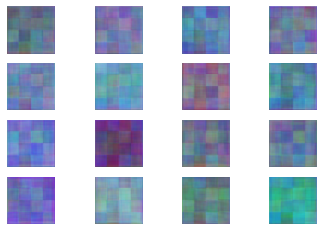

In [13]:
fig, axs = plt.subplots(4, 4)
cnt = 0
for i in range(4):
    for j in range(4):
        img = translated_image[cnt].permute(1, 2, 0)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        cnt += 1

In [14]:
from mmgen.apis import train_model
from mmgen.datasets import build_dataset

In [15]:
datasets = [build_dataset(cfg.data['train'])]

In [16]:
train_model(model, datasets, cfg)

/media/user1-lipai/Data/users/matheus/tcc/mmgeneration/mmgen/core/runners/dynamic_iterbased_runner.py:255: DeprecationWarning: setting max_iters in run is deprecated, please set max_iters in runner_config
  warnings.warn(
2022-01-09 09:52:01,671 - mmgen - INFO - Start running, host: user1-lipai@user1lipai-2070, work_dir: /media/user1-lipai/Data/users/matheus/tcc/mmgeneration/work_dirs/tutorial
2022-01-09 09:52:01,671 - mmgen - INFO - workflow: [('train', 10000)], max: 5000 iters
2022-01-09 09:52:01,671 - mmgen - INFO - Checkpoints will be saved to ./work_dirs/tutorial/ckpt/tutorial by HardDiskBackend.


RuntimeError: CUDA out of memory. Tried to allocate 6.25 GiB (GPU 0; 7.79 GiB total capacity; 4.41 GiB already allocated; 1.89 GiB free; 4.68 GiB reserved in total by PyTorch)

In [ ]:
gen_imgs = sample_uncoditional_model(model, 4)

In [ ]:
gen_imgs = (gen_imgs[:, [2, 1, 0]] + 1.) / 2.

In [ ]:
fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        img = gen_imgs[cnt].permute(1, 2, 0)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        cnt += 1

In [ ]:
gen_imgs = sample_uncoditional_model(model, 4)
fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        img = gen_imgs[cnt].permute(1, 2, 0)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        cnt += 1

In [ ]:
from torchvision import utils
import os
mmcv.mkdir_or_exist(os.path.dirname('./work_dirs/demos/conditional_samples.png'))

In [ ]:
gen_imgs = sample_uncoditional_model(model, 4)
gen_imgs = (gen_imgs[:, [2, 1, 0]] + 1.) / 2.
utils.save_image(gen_imgs, './work_dirs/demos/conditional_samples.png', nrow=6, padding=1)